In [43]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline
import sweetviz as sv
import matplotlib.pyplot as plt
!pip install matplotlib
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable


In [4]:
data = pd.read_csv('wine.csv')

In [5]:
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.shape

(178, 14)

In [10]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [16]:
data.Wine

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [17]:
box = data[['Alcohol','Malic.acid','Ash',
            'Acl','Mg','Phenols','Flavanoids','Color.int',
            'Hue','OD','Proline']]

C:\Users\chand\AppData\Local\Temp\ipykernel_13108\3325494998.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(box[c])
C:\Users\chand\AppData\Local\Temp\ipykernel_13108\3325494998.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(box[c])
C:\Users\chand\AppData\Local\Temp\ipykernel_13108\3325

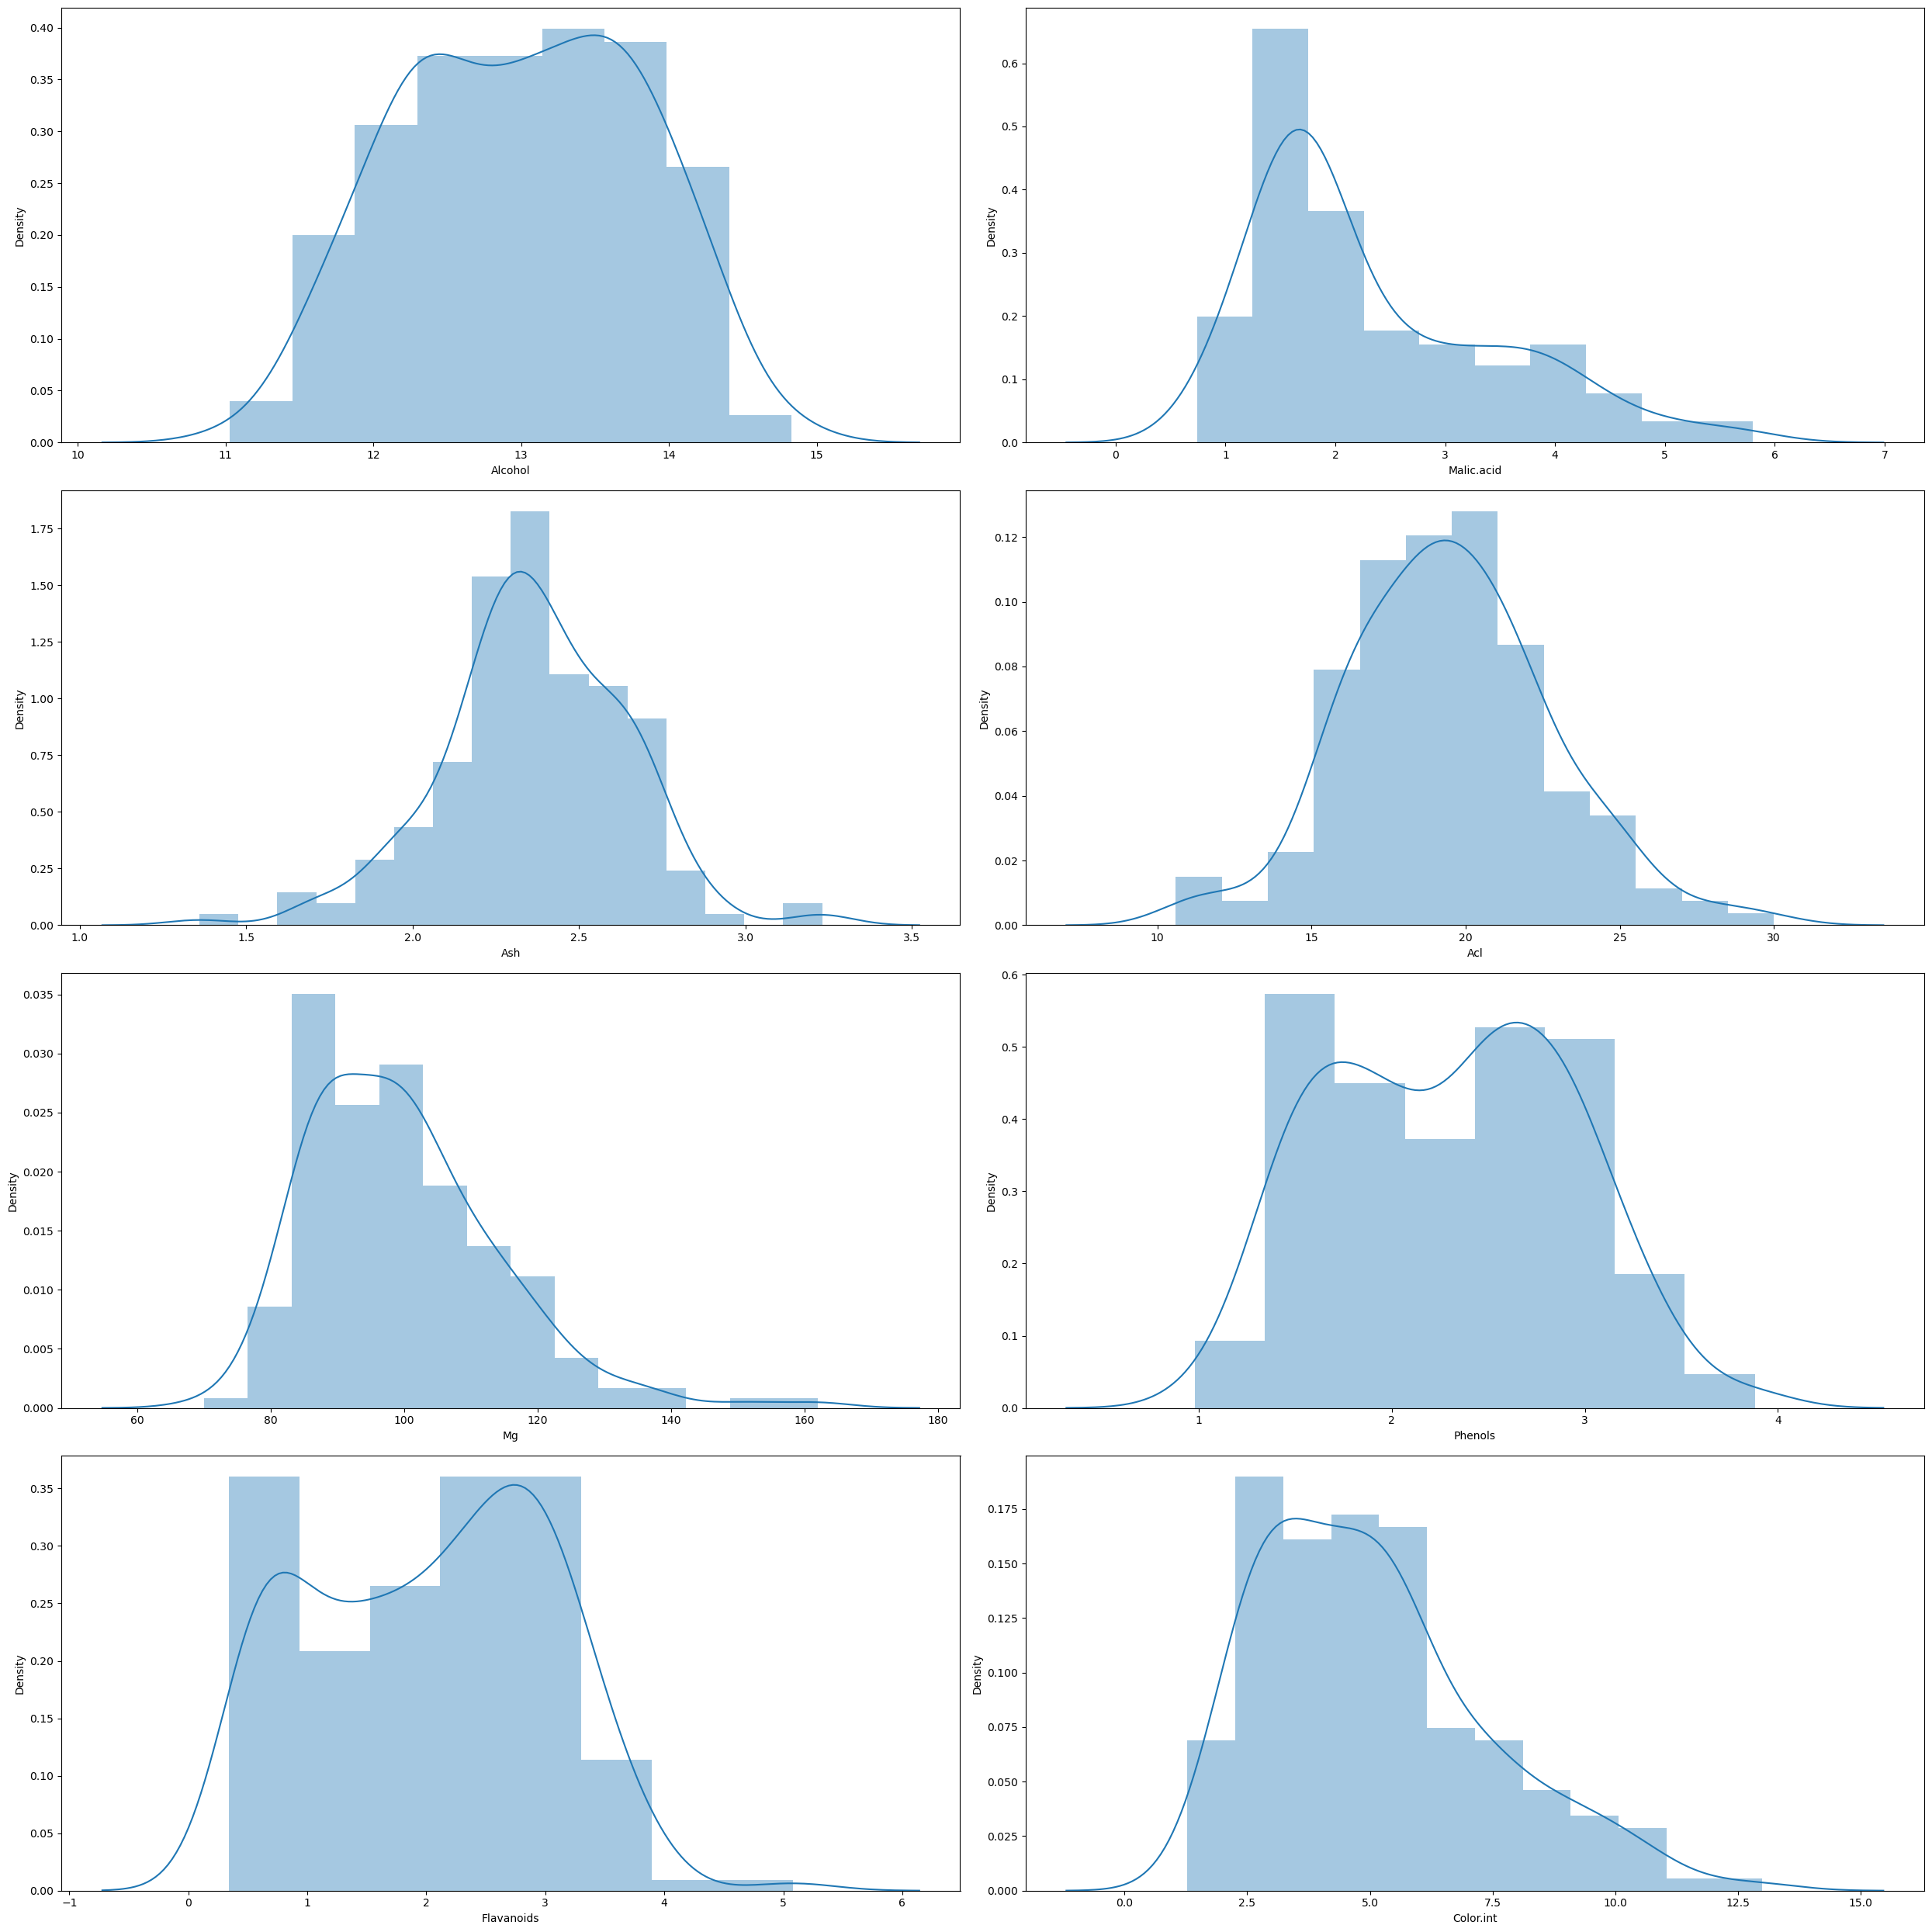

In [22]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)
        sns.distplot(box[c])
        plotnum+=1
        plt.tight_layout()

C:\Users\chand\AppData\Local\Temp\ipykernel_13108\3234137299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Proanth'])


<Axes: xlabel='Proanth', ylabel='Density'>

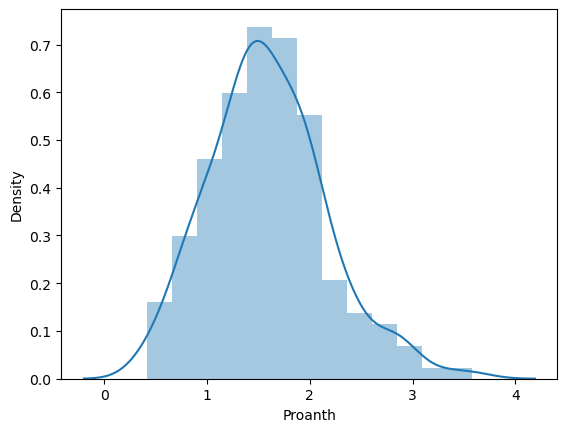

In [28]:
sns.distplot(data['Proanth'])

In [27]:
data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

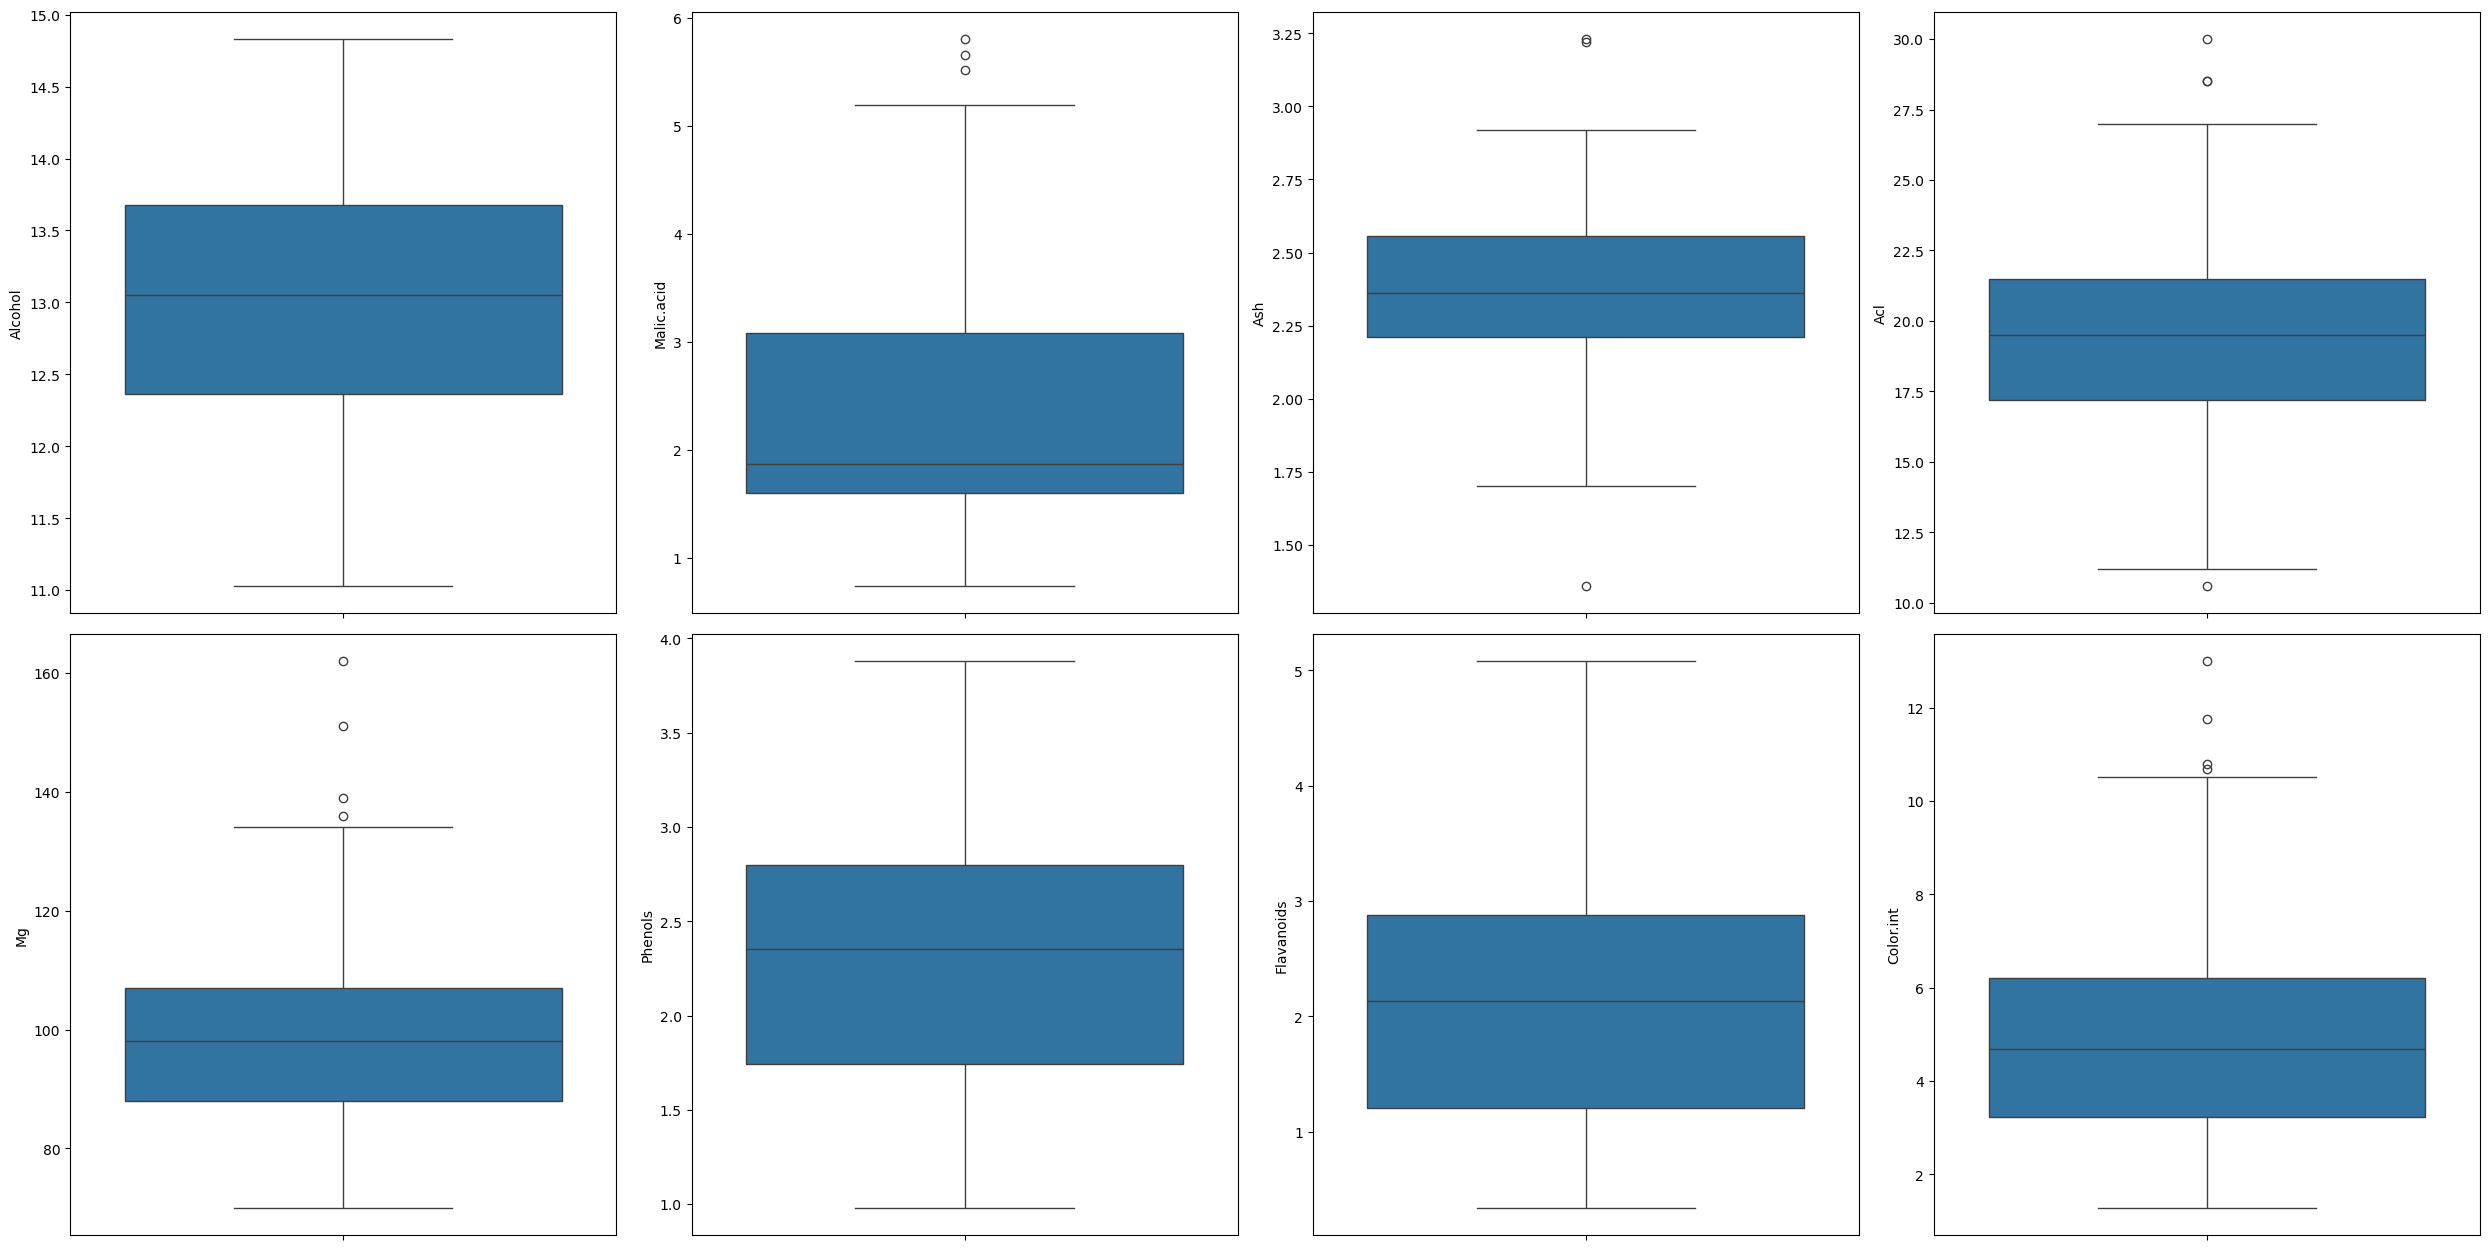

In [32]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,4,plotnum)
        sns.boxplot(box[c])
        plotnum+=1
        plt.tight_layout()

In [33]:
from scipy import stats

In [41]:
IQR = stats.iqr(data['Malic.acid'], interpolation='midpoint')
IQR

1.46

In [47]:
# Check and print the column names
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify if 'Malic_acid' exists in the DataFrame
if 'Malic_acid' in data.columns:
    Q1 = data['Malic_acid'].quantile(0.25)
    Q3 = data['Malic_acid'].quantile(0.75)
    
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, min_limit: {min_limit}, max_limit: {max_limit}")
else:
    print("Column 'Malic_acid' does not exist in the DataFrame")


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')
Column 'Malic_acid' does not exist in the DataFrame


In [54]:

# Check and print the column names
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Print the first few rows of the DataFrame to verify the data
print(data.head())

# Verify if 'Malic_acid' exists in the DataFrame
if 'Malic_acid' in data.columns:
    Q1 = data['Malic_acid'].quantile(0.25)
    Q3 = data['Malic_acid'].quantile(0.75)
    
    print(f"Q1: {Q1}, Q3: {Q3}")  # Verify Q1 and Q3 values
    
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    print(f"IQR: {IQR}, min_limit: {min_limit}, max_limit: {max_limit}")
else:
    print("Column 'Malic_acid' does not exist in the DataFrame")


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04 

In [55]:
import pandas as pd
from scipy import stats

# Check and print the column names
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Print the first few rows of the DataFrame to verify the data
print(data.head())

# Verify if 'Malic_acid' exists in the DataFrame
if 'Malic_acid' in data.columns:
    Q1 = data['Malic_acid'].quantile(0.25)
    Q3 = data['Malic_acid'].quantile(0.75)
    
    print(f"Q1: {Q1}, Q3: {Q3}")  # Verify Q1 and Q3 values
    
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    print(f"IQR: {IQR}, max_limit: {max_limit}, max_limit: {max_limit}")
else:
    print("Column 'Malic_acid' does not exist in the DataFrame")


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04 

In [51]:
data.loc[data['Malic_acid']>max_limit,'Malic_acid']=np.median(data.Malic_acid)

AttributeError: 'DataFrame' object has no attribute 'Malic_acid'

In [56]:

# Print the column names to ensure 'Malic_acid' exists
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Print a few rows of the DataFrame to inspect
print(data.head())

# Check if 'Malic_acid' exists in the DataFrame
if 'Malic_acid' in data.columns:
    # Compute median value
    median_value = np.median(data['Malic_acid'])
    
    # Replace values exceeding max_limit with the median
    data.loc[data['Malic_acid'] > max_limit, 'Malic_acid'] = median_value

    print("Column 'Malic_acid' updated successfully.")
else:
    print("Column 'Malic_acid' does not exist in the DataFrame")


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04 